In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("traffic_data.csv")

In [7]:
# Inspect columns and data
print(data.columns)
print(data.head())

Index(['DateTime', 'Junction', 'Vehicles', 'ID'], dtype='object')
              DateTime  Junction  Vehicles           ID
0  2015-11-01 00:00:00         1        15  20151101001
1  2015-11-01 01:00:00         1        13  20151101011
2  2015-11-01 02:00:00         1        10  20151101021
3  2015-11-01 03:00:00         1         7  20151101031
4  2015-11-01 04:00:00         1         9  20151101041


In [8]:
# Convert 'DateTime' to pandas datetime format
data['DateTime'] = pd.to_datetime(data['DateTime'])

In [9]:
# Extract hour and day_of_week from 'DateTime'
data['hour'] = data['DateTime'].dt.hour
data['day_of_week'] = data['DateTime'].dt.dayofweek

In [10]:
# Feature selection: We'll use 'hour' and 'day_of_week' as features, and 'Vehicles' as the target
X = data[['hour', 'day_of_week']]  # Features
y = data['Vehicles']  # Target (the number of vehicles)

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Train a Random Forest model to predict traffic (number of vehicles)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [13]:
# Predict traffic (number of vehicles) on the test set
y_pred = model.predict(X_test)

In [14]:
# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")


Mean Absolute Error: 14.491993442939053
Mean Squared Error: 368.4103607046662


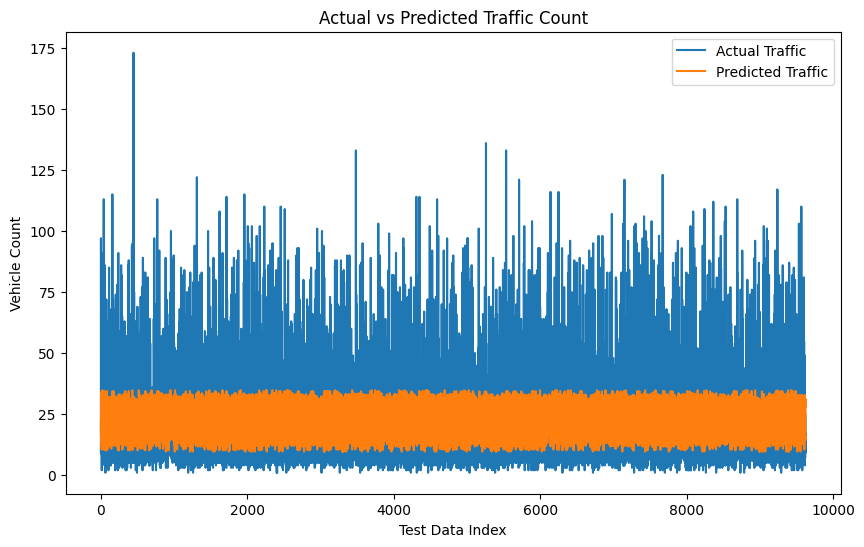

In [15]:
# Visualize Actual vs Predicted Traffic Count
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual Traffic')
plt.plot(y_pred, label='Predicted Traffic')
plt.title('Actual vs Predicted Traffic Count')
plt.xlabel('Test Data Index')
plt.ylabel('Vehicle Count')
plt.legend()
plt.show()

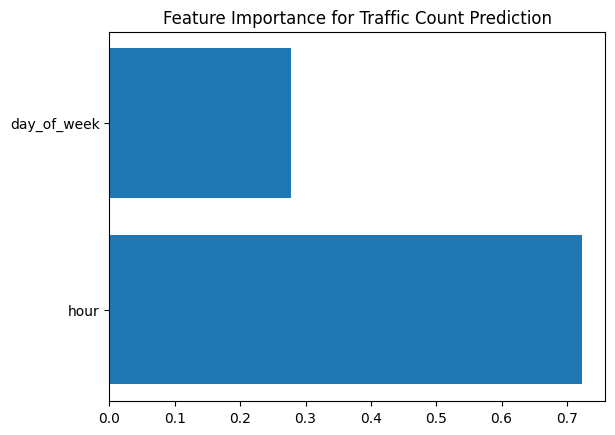

In [16]:
# Feature importance (optional but useful)
importances = model.feature_importances_
feature_names = X.columns
plt.barh(feature_names, importances)
plt.title('Feature Importance for Traffic Count Prediction')
plt.show()